In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.cluster import KMeans 

In [8]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [9]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.shape

(210, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [11]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
df.describe(include ='all')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168FC307C50>,
      dtype=object)

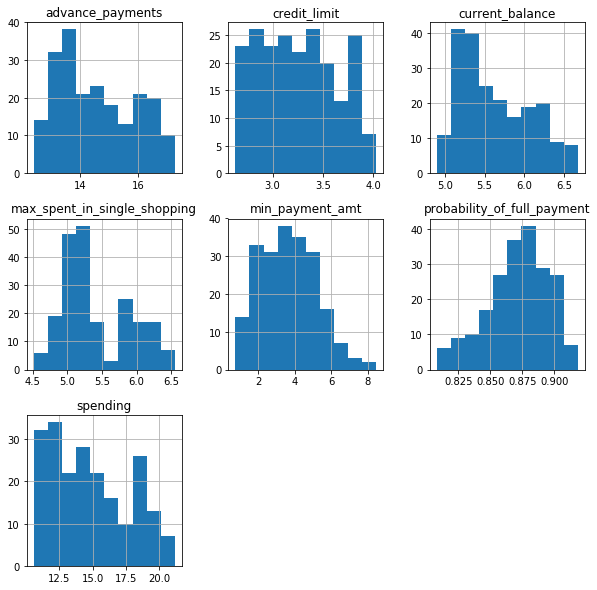

In [10]:
df.hist(figsize=(10,10))

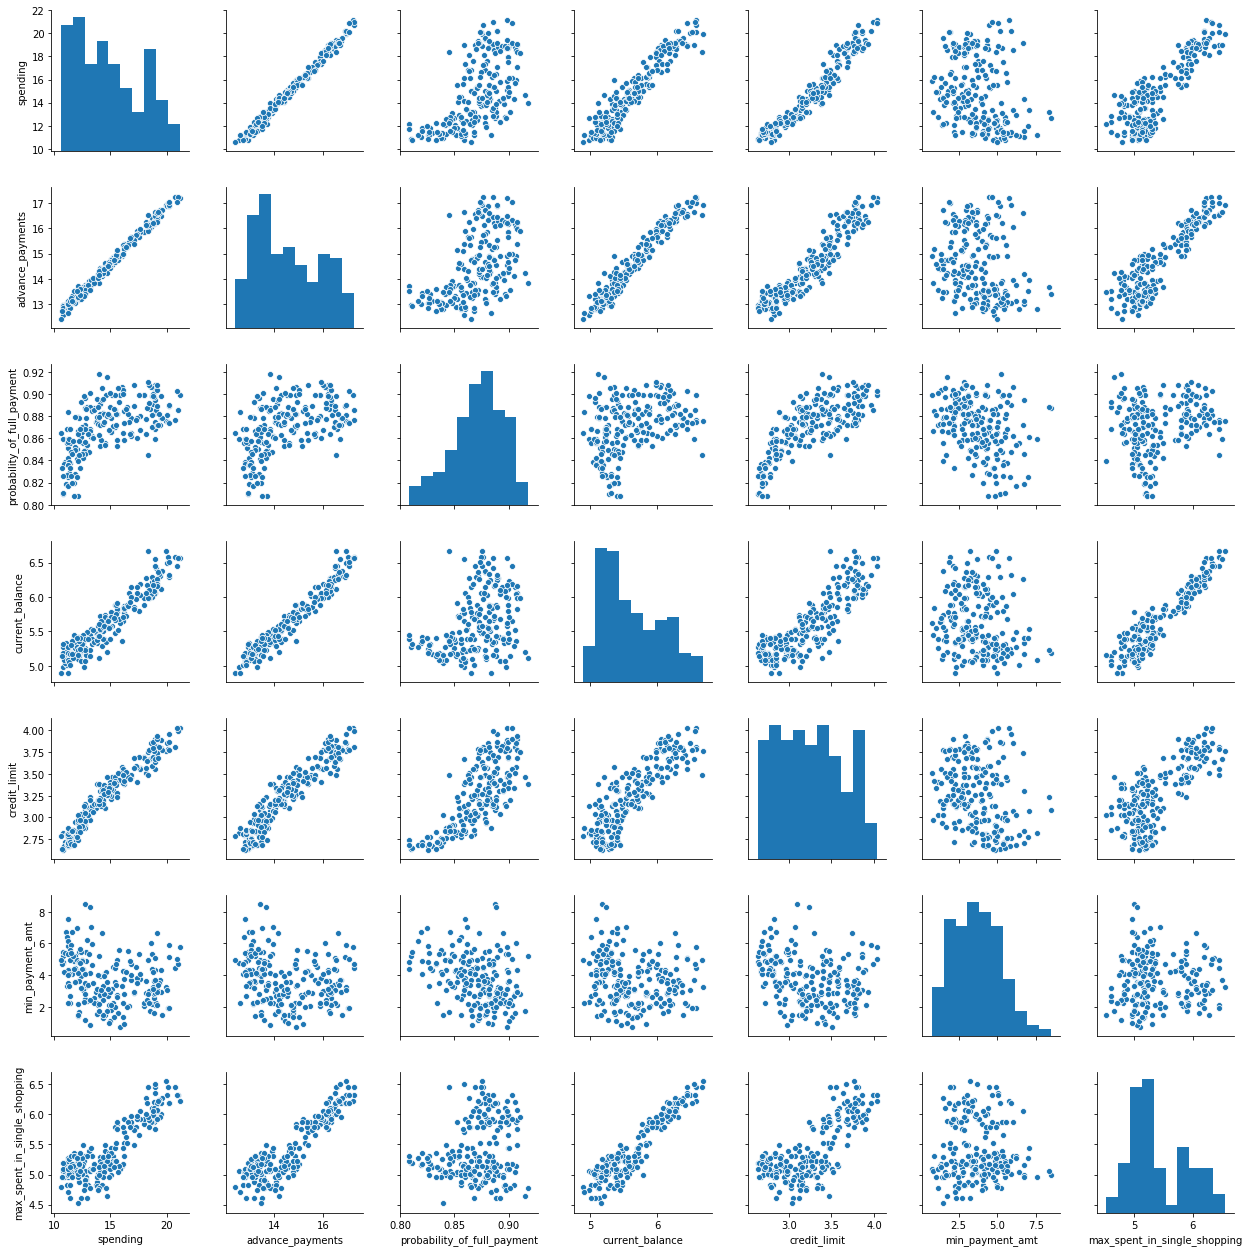

In [12]:
sns.pairplot(df)
plt.show()

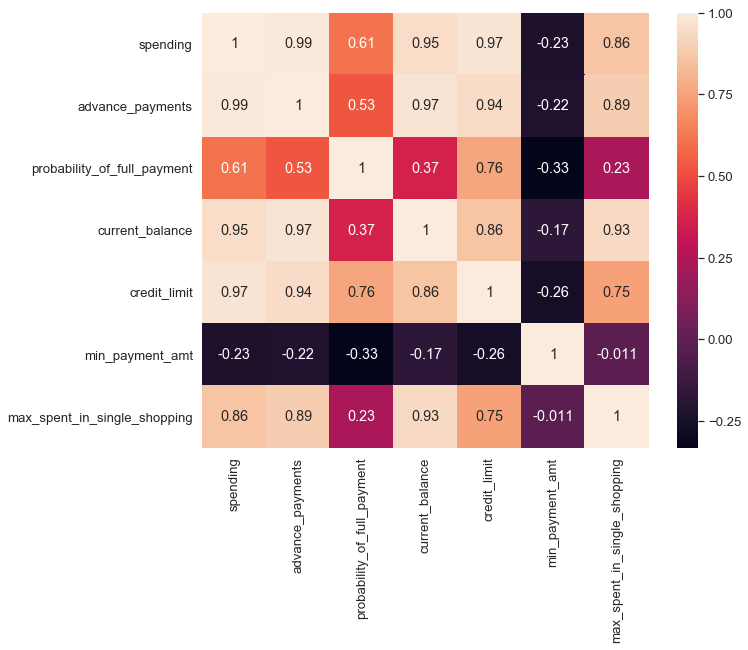

In [13]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']].corr(), annot=True)

In [12]:
df.duplicated().sum()

0

In [24]:
scaled_features = StandardScaler().fit_transform()

In [28]:
scaled_df = scaled_features[:1,:]

In [30]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987,  2.36753251,  1.33857863,
        -0.29880602,  2.3289982 ]])

In [33]:
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [34]:
scaled_features_df.head(3)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107


In [47]:
scaled_features_df.describe(include ='all')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [53]:
link_method = linkage(scaled_features_df.iloc[:,1:7], method = 'average')
labelList = np.array(scaled_features_df)
labelList

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

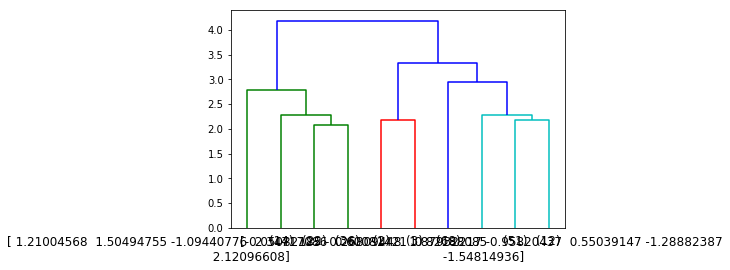

In [62]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList 
                 )

In [63]:
from scipy.cluster.hierarchy import fcluster

In [64]:
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1,
       1, 2, 2, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1], dtype=int32)

In [65]:
df['clusters'] = clusters

In [66]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [67]:
df.to_csv('bank_marketing.csv')

In [68]:
df.clusters.value_counts().sort_index()

1     73
2      5
3    132
Name: clusters, dtype: int64

In [69]:
aggdata=df.iloc[:,1:9].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,
1,16.108219,0.883471,6.149000,3.669945,3.591041,6.009918,73
2,13.996000,0.896140,5.321800,3.287600,6.856600,4.994800,5
3,13.724015,0.863148,5.352318,3.030023,3.641009,5.090886,132


In [ ]:
Cluster 1: Medium performing client
Cluster 2: Poor performing client
Cluster 3: Top performing client

In [70]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [71]:
k_means.fit(scaled_features_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [72]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [73]:
k_means.inertia_

659.1717544870407

In [74]:
k_means = KMeans(n_clusters = 1,random_state=1)

In [75]:
k_means.fit(scaled_features_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [76]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
k_means.inertia_

1470.0

In [78]:
k_means = KMeans(n_clusters = 3,random_state=1)

In [79]:
k_means.fit(scaled_features_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [80]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [81]:
k_means.inertia_

430.65897315130053

In [82]:
k_means = KMeans(n_clusters = 4,random_state=1)

In [83]:
k_means.fit(scaled_features_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [84]:
k_means.labels_

array([1, 0, 1, 3, 1, 3, 3, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3,
       1, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 1,
       1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 0, 3, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 0, 1,
       2, 0, 1, 3, 3, 2, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0,
       0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 0, 1, 1, 1,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 1, 0, 2, 1, 3,
       1, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2])

In [85]:
k_means.inertia_

371.301721277542

In [86]:
k_means = KMeans(n_clusters = 5,random_state=1)

In [87]:
k_means.fit(scaled_features_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [88]:
k_means.labels_

array([1, 3, 1, 2, 1, 0, 2, 3, 1, 0, 1, 4, 2, 1, 0, 0, 3, 0, 0, 0, 0, 2,
       1, 0, 3, 4, 3, 2, 2, 2, 3, 0, 0, 3, 2, 2, 2, 0, 2, 1, 1, 3, 4, 1,
       2, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1, 4, 0, 2, 2, 1, 3, 0, 2, 4, 3, 1,
       1, 3, 1, 0, 3, 0, 1, 1, 0, 1, 3, 2, 4, 3, 3, 3, 3, 1, 2, 4, 4, 4,
       4, 0, 3, 1, 3, 2, 0, 1, 1, 4, 2, 4, 0, 1, 3, 1, 3, 1, 1, 2, 0, 1,
       4, 3, 1, 2, 2, 4, 3, 0, 2, 1, 0, 2, 0, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       0, 1, 2, 1, 1, 0, 4, 3, 4, 3, 2, 0, 0, 0, 1, 2, 3, 2, 3, 0, 3, 4,
       0, 3, 0, 2, 3, 1, 1, 0, 1, 4, 1, 0, 4, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 0, 4, 0, 3, 0, 3, 3, 4, 4, 0, 4, 3, 2, 0, 3, 2, 1, 3, 4, 1, 0,
       1, 2, 3, 4, 3, 2, 4, 3, 4, 3, 3, 4])

In [89]:
k_means.inertia_

327.96082400790306

In [90]:
k_means = KMeans(n_clusters = 6,random_state=1)

In [91]:
k_means.fit(scaled_features_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [92]:
k_means.labels_

array([0, 3, 0, 4, 0, 5, 1, 3, 0, 1, 0, 2, 1, 0, 1, 5, 3, 5, 1, 1, 1, 5,
       0, 1, 3, 2, 1, 4, 4, 5, 3, 1, 1, 3, 4, 4, 5, 5, 4, 0, 0, 3, 2, 0,
       4, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 5, 5, 4, 0, 3, 5, 4, 2, 3, 0,
       0, 3, 0, 1, 3, 1, 0, 0, 5, 0, 3, 4, 2, 3, 3, 3, 3, 0, 4, 2, 2, 2,
       2, 5, 3, 0, 3, 4, 1, 0, 0, 2, 4, 2, 5, 0, 3, 0, 3, 0, 0, 5, 5, 0,
       2, 3, 0, 5, 4, 2, 3, 5, 5, 0, 1, 4, 5, 1, 3, 3, 0, 4, 3, 3, 4, 3,
       1, 0, 4, 0, 0, 1, 2, 3, 2, 3, 4, 1, 1, 5, 0, 4, 3, 5, 3, 1, 3, 2,
       1, 3, 1, 4, 3, 0, 0, 1, 0, 2, 0, 5, 2, 3, 3, 1, 3, 4, 3, 0, 0, 0,
       3, 1, 2, 5, 3, 1, 3, 3, 2, 2, 1, 2, 3, 4, 1, 3, 4, 0, 3, 2, 0, 5,
       0, 4, 3, 2, 3, 5, 2, 3, 2, 3, 3, 2])

In [93]:
k_means.inertia_

290.59003059682186

In [103]:
wss=[]

In [104]:
for i in range (1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(scaled_features_df)
    wss.append(KM.inertia_)

In [105]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.301721277542,
 327.35442092981316,
 289.4518051947612,
 264.14673804820933,
 239.28181527825586,
 221.18536872961658,
 209.98269562947308]

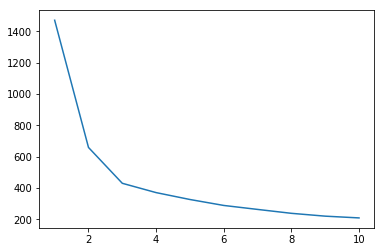

In [106]:
plt.plot(range (1,11) , wss)

In [ ]:
optimum clusters is 3 as the WWS keeps dropping when we keep adding 1 cluster to the data

In [109]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_features_df)
lables= k_means.labels_

In [120]:
df1 = pd.read_csv('bank_marketing_part1_Data.csv')

In [121]:
df1["Clus_kmeans"] = lables
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [118]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [119]:
silhouette_score(scaled_features_df ,lables)

0.4007270552751299

In [126]:
sil_width = silhouette_samples(scaled_features_df ,lables)

In [127]:
df1["sil_width"] = sil_width
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [128]:
silhouette_samples(scaled_features_df ,lables).min()

0.002713089347678533

In [ ]:
This indicates that there is no observation no customenr record that is incorrectly mapped and all the silhouette score are positive.

In [129]:
df1.to_csv('bank_marketing 1.csv')

In [ ]:
Cluster 0: Least spending group
Cluster 1: Premium spending group
Cluster 2: mediocure spending group